In [1]:
# necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# dataset
dataset = pd.read_csv('gdp per capita.csv')

'''choose for clustering because its very long dataset but we only choose two years for clustering'''
df = dataset[["1961","1962"]]


'''droping null values because it making error in clustering due to this reason we remove all null records sorry for that '''

X = df.dropna()

# make arrary
Y = X.values


In [3]:
df.describe()

,1961,1962
count,134.000000,137.000000
mean,491.319126,513.310714
std,639.768277,668.981516
min,26.308357,26.985920
25%,109.078291,114.581807
50%,197.158225,203.437370
75%,475.401427,520.206131
max,3066.562869,3243.843078


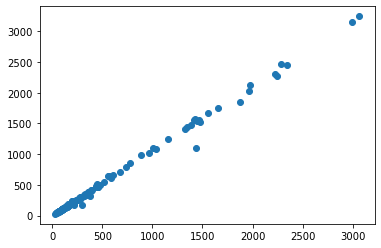

In [6]:
plt.scatter(Y[:,0], Y[:,1])
plt.show()

In [52]:
# normalizing the dataset

from sklearn import preprocessing

'''normalize the dataset with builtin library of python sklearn using preprocessing'''
normalized = preprocessing.normalize(X)
normalized

array([[0.68539761, 0.72816902],
       [0.71544056, 0.6986736 ],
       [0.68936474, 0.72441442],
       [0.71144322, 0.70274358],
       [0.68817869, 0.72554124],
       [0.69592995, 0.71810967],
       [0.68436782, 0.72913695],
       [0.71121646, 0.70297307],
       [0.68302701, 0.73039312],
       [0.69801292, 0.71608516],
       [0.68571383, 0.72787124],
       [0.69526851, 0.7187501 ],
       [0.69658057, 0.71747858],
       [0.6820887 , 0.73126945],
       [0.67901578, 0.73412368],
       [0.68609426, 0.72751266],
       [0.7091927 , 0.70501469],
       [0.70267822, 0.71150777],
       [0.67900097, 0.73413738],
       [0.65586229, 0.75488056],
       [0.73029894, 0.6831277 ],
       [0.70527003, 0.70893878],
       [0.69271847, 0.7212081 ],
       [0.64215999, 0.76657064],
       [0.68244371, 0.73093815],
       [0.68694259, 0.72671169],
       [0.72800651, 0.68557021],
       [0.69401059, 0.7199648 ],
       [0.63428749, 0.77309726],
       [0.78011534, 0.62563572],
       [0.

In [53]:
# Import curve fitting package from scipy
from scipy.optimize import curve_fit

# x and y data for curve fit method

xdata = X["1961"]
ydata = X["1962"]

'''guassian function that use in curve fit this is chunk of function that use in future function'''
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

# fit model method
def fitModel():
    
'''call method guass from top and make curve fit that is builtin function of scipy'''
    parameters, covariance = curve_fit(Gauss,xdata, ydata)
    
#     split boht parameter
    fit_A = parameters[0]
    fit_B = parameters[1]
    
#     fit y 
    fit_y = Gauss(X, fit_A, fit_B)
    
#     plotting
    plt.plot(xdata, ydata, 'o', label='data')
    plt.plot(xdata, fit_y, '-', label='fit')
    plt.legend()

IndentationError: expected an indented block (Temp/ipykernel_7952/2849205649.py, line 17)

E:\Files\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


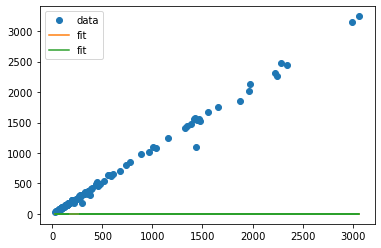

In [54]:
fitModel()

In [55]:
# prediction for future values
from sklearn.cluster import KMeans

'''how many numbers of cluster we make in this dataset checking probability of number of cluster'''
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)

E:\Files\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


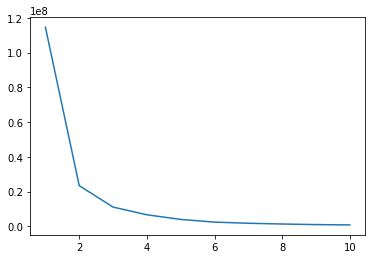

In [56]:
plt.plot(range(1,11),wcss)

In [67]:

'''after checking set num of cluster according to elbow chart'''


kmeans = KMeans(n_clusters = 3, init = "k-means++")

# fit and predict
y_kmeans = kmeans.fit_predict(Y)

y_kmeans

array([0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2,
       2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0,
       0, 0])

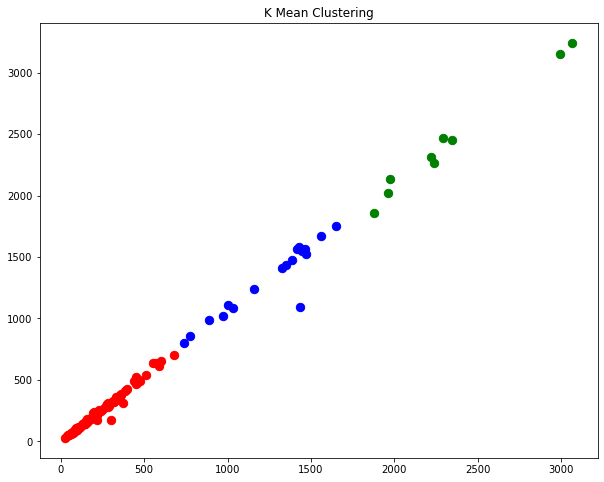

In [60]:
'''as we say we done with clustering then we also want to show are we right or not becuase visualization is 
beautiful technqiue that give us a better results according to our prediction let check using matplot'''


plt.figure(figsize = (10,8))
plt.title("K Mean Clustering")
#cluster 1
plt.scatter(Y[y_kmeans==0,0], Y[y_kmeans==0,1], s=70, c="red")

#cluster 2
plt.scatter(Y[y_kmeans==1,0], Y[y_kmeans==1,1], s=70, c="green")

#cluster 3
plt.scatter(Y[y_kmeans==2,0], Y[y_kmeans==2,1], s=70, c="blue")



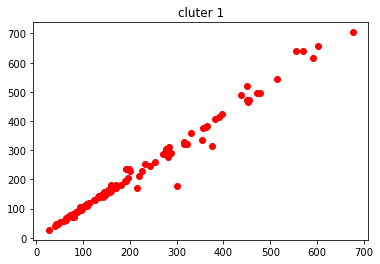

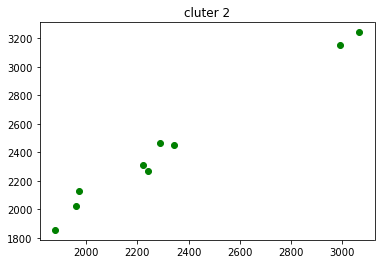

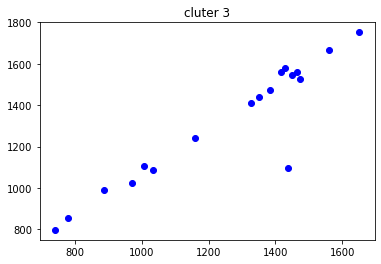

In [65]:
# Interpretation of the results.
'''according to this results we totally satisfied because y_kmeans clearly define that starting records 
is belong to 0 cluster most of the records presents in this cluter and afte that we saw 1 and 2 accordingly
after that we saw using matplot visualization that we have these clusters in also visualization

red denote 0

green denote 1

blue denote 2'''
#cluster 1
c = ["red","green", "blue"]
for i in range(3):
    string = f"cluter {i+1}"
    plt.title(string)
    plt.scatter(Y[y_kmeans==i,0], Y[y_kmeans==i,1], color=c[i])
    plt.show()